## Support Vector Regressor Implementation

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
## Lets create synthetic data points
from sklearn.datasets import make_regression

In [4]:
X,y = make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [5]:
X

array([[ 0.7291611 ,  0.90765864],
       [-0.68909407, -0.12380113],
       [ 0.39215444,  2.68941105],
       ...,
       [-0.02755895,  0.67888078],
       [-0.35121579, -0.77489612],
       [ 1.20343909,  0.19122383]])

In [6]:
y

array([ 6.18810343e+01, -5.41265844e+01,  3.97865775e+01, -1.36964903e+01,
        4.44509641e+01, -6.24073965e+01,  2.89052048e+01, -2.03250288e+02,
        1.36381794e+02, -6.50325913e+00, -6.58132264e+01,  6.80157381e+01,
        3.72641283e+01,  1.13856558e+02,  3.89852725e+01, -9.82739081e+01,
        2.77356054e+01, -1.18517011e+02, -1.67330216e+02, -4.58322089e+01,
        4.56067018e+00, -6.07456343e+01, -1.31431426e+02, -2.22727152e+01,
        5.53573786e+01,  2.88903051e+01,  1.51156939e+02,  7.08132119e+01,
        5.52705041e+01, -9.92686225e+01,  6.01315977e+01,  5.02274766e+01,
        2.68676420e+01,  1.66926914e+00,  4.20235916e+01, -2.88002334e+01,
       -7.27920863e+00,  2.09778142e+02, -2.71155683e+01,  7.86293396e+01,
        1.04651161e+02,  8.69822790e+01, -8.41655014e+01,  7.13575760e+01,
       -3.18148771e+01, -1.75359172e+01,  3.43895875e+01,  9.96373962e+01,
        1.29192086e+02, -3.29246936e+01,  3.63686733e+01, -1.03542857e-02,
        1.63354941e+02, -

In [7]:
pd.DataFrame(X)[0]

0      0.729161
1     -0.689094
2      0.392154
3     -0.175554
4      0.545618
         ...   
995   -0.878145
996   -0.580803
997   -0.027559
998   -0.351216
999    1.203439
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

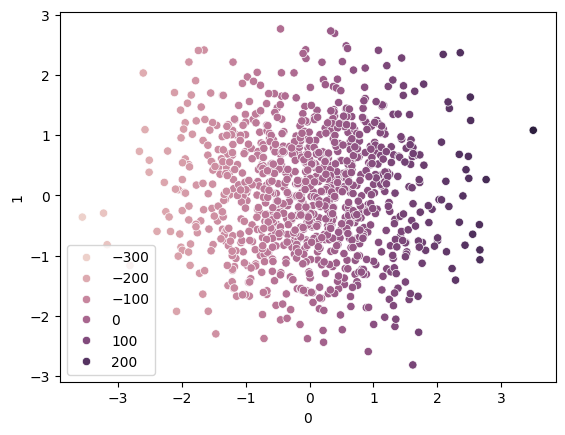

In [8]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [10]:
from sklearn.svm import SVR

In [11]:
svr=SVR(kernel='linear')

In [12]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [13]:
svr.coef_

array([[82.58731694,  4.10470238]])

In [14]:
## Prediction
y_pred=svr.predict(X_test)

In [15]:
y_pred

array([  61.65177637,  -51.9315695 ,  -59.70904997,   59.82367414,
         34.53239836, -147.04168082,   65.62624628,   20.19184334,
         74.713926  ,   46.37417618,  -46.48452812,    4.80858946,
        -25.19385264,   57.60390904,   78.43113458, -130.75683367,
         26.1930225 ,  -63.59367697,    7.14884636,   33.37008512,
         61.81757663,   66.74442861,   22.96583373,  101.75665881,
        -19.56751627,   26.70416641,  -57.1596329 ,  119.03280093,
        -54.25857483,   78.68656959,   92.80397045,   37.48549957,
         77.69714791,  128.13083227,  -17.06754079,   95.97985773,
        -62.88886514,   11.55271618,  -95.21090253,   32.265948  ,
       -128.20939419,   87.32762685,   -5.61277228,  -84.82902605,
        -97.77571681,   20.37606939,  136.7645466 ,  -88.86135201,
        -58.35055807,  217.57545867,   75.71589177,    8.8255768 ,
        -47.2499928 ,  -92.04559474,  -12.13058074,  -46.34577409,
         48.67429757,  119.97870558,   -2.37260946, -124.70920

In [16]:
from sklearn.metrics import r2_score


In [17]:
print(r2_score(y_test,y_pred))

0.9984299847531223


## Hyperparametere Tuning With SVR

In [18]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }

In [19]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,scoring='neg_mean_squared_error' ,cv=5,verbose=3)

In [20]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-1217.566 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-1182.171 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-1210.995 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-1324.208 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-1180.352 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-1217.566 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-1182.171 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-1210.995 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-1324.208 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-1180.352 total time=   0.0

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             scoring='neg_mean_squared_error', verbose=3)

In [22]:
grid.best_params_

{'C': 1000, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [23]:
## Prediction
y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.998474434026465
